# Task 1: Systolic Pressure (12 point)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score # Calculate MSE

In [9]:
pressure = pd.read_csv("bloodpressure.csv") # Import data # Pandas form
pressure.head()

,ID-NUMBER,AGE,ED-LEVEL,SMOKING STATUS,EXERCISE,WEIGHT,SERUM-CHOL,SYSTOLIC,IQ,SODIUM,GENDER,MARITAL-STATUS,NAME
0,1,27,2,1,1,120,193,126,118,136,F,M,"Braund, Mr. Owen Harris"
1,2,18,1,0,1,145,210,120,105,137,M,S,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,3,32,2,0,0,118,196,128,115,135,F,M,"Heikkinen, Miss. Laina"
3,4,24,2,0,1,162,208,129,108,142,M,M,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,5,19,1,2,0,106,188,119,106,133,F,S,"Allen, Mr. William Henry"


In [12]:
systolic = pressure['SYSTOLIC']
systolic = systolic.to_numpy().reshape(-1, 1)

In [14]:
pressure_predictor = pressure.drop(["ID-NUMBER", "SYSTOLIC", "NAME"], axis=1)
pressure_predictor.head()

,AGE,ED-LEVEL,SMOKING STATUS,EXERCISE,WEIGHT,SERUM-CHOL,IQ,SODIUM,GENDER,MARITAL-STATUS
0,27,2,1,1,120,193,118,136,F,M
1,18,1,0,1,145,210,105,137,M,S
2,32,2,0,0,118,196,115,135,F,M
3,24,2,0,1,162,208,108,142,M,M
4,19,1,2,0,106,188,106,133,F,S


In [9]:
# Dummies for multiple linear regression part
# To keep all values in the numeric value
pressure_predictor = pd.get_dummies(pressure_predictor, drop_first=True) 
pressure_predictor["GENDER_M"] = pressure_predictor["GENDER_M"].astype(int)
pressure_predictor["MARITAL-STATUS_M"] = pressure_predictor["MARITAL-STATUS_M"].astype(int)
pressure_predictor["MARITAL-STATUS_S"] = pressure_predictor["MARITAL-STATUS_S"].astype(int)
pressure_predictor["MARITAL-STATUS_W"] = pressure_predictor["MARITAL-STATUS_W"].astype(int)
pressure_predictor.head(10)

NameError: name 'pressure_predictor' is not defined

## Polynomial Regression
- a. Create polynomial regression models using the whole dataset to predict systolic pressure using the "WEIGHT" feature, for polynomial degrees ranging from 1 to 14.
- b. Perform 10-fold cross-validation
- c. Compute and display the mean RMSEs of the 10-fold cross-validation for each of the 14 polynomial degrees
- d. Produce a cross-validation error plot showing the mean RMSE for polynomial degrees from 1 to 14

In [18]:
# a. Create polynomial regression models to predict Systolic using "Weight", from degree 1 to 14
lin_reg = LinearRegression()
X = pressure_predictor["WEIGHT"].to_numpy().reshape(-1, 1) # Change into numpy value with 1 column and as many rows as needed
y = systolic

def X_poly_transform(degree):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False) # Change with corresponding degree
    return poly_features # result: a standard degree that apply for predictor varaible in later stage

def poly_model(degree, OG_data = X): # We can use degree from 1 to infinity, with default data from column "Weight"
    X_poly = X_poly_transform(degree).fit_transform(OG_data) 
    # Change the format (desired degree), then
    # Create a new array containing all X within the particular degree
    model = lin_reg.fit(X_poly, y)  # Fit into a model with y from column "Systolic"
    return model

poly_model(1) # Model with degree 1
poly_model(2) # Model with degree 2
### etc until degree 14
poly_model(14) # Model with degree 14
# This function will shortcut the task but it make the computer run multiple times
# Hence, because this data is small, I use this way. Otherwise, I will create and store 14 different models

LinearRegression()

In [34]:
lin_reg = LinearRegression()
X = pressure_predictor["WEIGHT"].to_numpy().reshape(-1, 1) # Change into numpy value with 1 column and as many rows as needed
y = systolic

polyList_models = {}
poly_cv_10fold = {}
poly_rmse = {}

for degree in range(1,8):
    # a. Create polynomial regression models to predict Systolic using "Weight", from degree 1 to 14
    poly_features = PolynomialFeatures(degree = degree, include_bias = False)
    model = Pipeline([
        ("poly_features", poly_features), 
        ("lin_reg", LinearRegression()), 
    ])
    model.fit(X,y)
    polyList_models[f'model{degree}'] = model

    # b. 10-fold cross validation
    X_poly = poly_features.fit_transform(X) 
    mse_scores = -cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
    poly_cv_10fold[f'model{degree}'] = mse_scores

    # c. RMSEs of 10-fold CV for each degree
    rmse_scores = np.sqrt(mse_scores)
    mean_rmse_scores = np.mean(rmse_scores)
    poly_rmse[f'model{degree}'] = mean_rmse_scores

In [36]:
poly_cv_10fold 

{'model1': array([ 70.05369358, 203.38440588,  86.29421725,  69.56906143,
         83.79965446, 108.03486816,  42.1511386 , 129.13807027,
        107.73677641, 158.51251123]),
 'model2': array([ 71.23405418, 211.83082771,  86.38462615,  68.92610164,
         96.88222903, 107.43918949,  41.53959718, 128.32700793,
        107.05350525, 167.77034269]),
 'model3': array([ 59.46673933, 364.39649243,  91.94175155,  73.03298685,
         81.30724158,  96.31092354,  57.94872079, 113.93510363,
         96.98063397, 163.91250127]),
 'model4': array([ 51.40268459, 497.75544538,  85.88308323,  65.42883308,
         83.60081607, 102.02467741,  79.79894136, 116.36461411,
         91.65084245, 167.0743425 ]),
 'model5': array([ 41.67672415, 414.44787392,  97.52868611,  65.13618963,
         91.2679506 ,  93.42779184,  62.87457348, 112.80121287,
         85.73580382, 161.91371339]),
 'model6': array([ 40.69522532, 396.57834646,  99.24171816,  67.59050309,
         90.02452892,  91.97481686,  62.441494

In [754]:
# Testing if we can using the model store in the dictionary
testing_degree = input('Enter a degree')
testing_degree = 'model'+testing_degree

testing_model = polyList_models[testing_degree]

X_new = np.array([[120], [130]])

testing_prediction = testing_model.predict(X_new)
print(testing_prediction)

Enter a degree 4


[[124.56090105]
 [127.74867428]]


In [38]:
# b. 10-fold cross validation


def fold10_cv_poly(degree, OG_data = X):
    X_poly = X_poly_transform(degree).fit_transform(OG_data) 
    mse_scores = -cross_val_score(poly_model(degree), X_poly, y, cv=10, scoring='neg_mean_squared_error')
    return mse_scores
    
fold10_cv_poly(4) # MSE score when degree is 1

array([ 51.40268459, 497.75544538,  85.88308323,  65.42883308,
        83.60081607, 102.02467741,  79.79894136, 116.36461411,
        91.65084245, 167.0743425 ])

In [552]:
# c. RMSEs of 10-fold CV for each degree
collect_rmse = []
for degree in range(1,15):
    rmse_scores = np.sqrt(fold10_cv(degree))
    mean_rmse_scores = np.mean(rmse_scores)
    collect_rmse.append(mean_rmse_scores)

collect_rmse

[10.063566348213604,
 10.187166706053542,
 10.470321681840364,
 10.829963377150463,
 10.45133716702582,
 10.4018597256369,
 10.329004499108617,
 10.240305476454346,
 10.159177954821084,
 10.130294263447153,
 10.240212879403142,
 10.712133802678924,
 12.002013373747856,
 14.697035935941656]

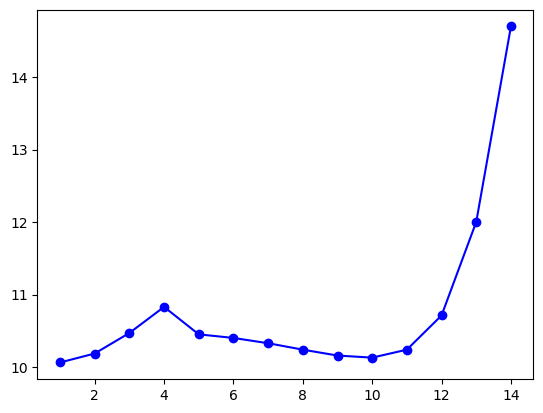

In [780]:
# d. Visualisation
plt.plot(range(1,15), poly_rmse.values(, "bo-")

## Model Selection
- a. Select the best polynomial degree and briefly explain your choice
- b. Print the intercept and coefficients of the selected model

In [556]:
## Choose the best one
print(np.min(collect_rmse))
best_degree = np.argmin(collect_rmse) + 1
print("Degree", best_degree)

10.063566348213604
Degree 1


In [558]:
## Print intercept and coefficients of the model
intercept = poly_model(best_degree).intercept_[0]
coefficients = poly_model(best_degree).coef_[0,0]
print("Intercept", intercept)
print("Coefficients", coefficients)
print(f'Best equation: Systolic = {round(intercept, 3)} + {round(coefficients, 3)} Weight')

Intercept 90.28431413226751
Coefficients 0.2669545938540424
Best equation: Systolic = 90.284 + 0.267 Weight


## Multiple Linear Regression
- a. Create a multiple linear regression model to predict systolic pressure using all the other relevant useful features in the dataset.
- b. Print the intercept and coefficients of the model.
- c. Perform 10-fold cross-validation.
- d. Compute and display the mean RMSE for the 10-fold cross-validation

In [570]:
# a. Create model with all other features
y_multi = systolic # Different name for different model, but the same value
X_multi = pressure_predictor.to_numpy() # Whole remaining dataset with dummies

lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_multi, y_multi)

LinearRegression()

In [572]:
# b. Intercept and Coefficients
multi_intercept = lin_reg_multi.intercept_[0]
multi_coefficients = lin_reg_multi.coef_
print("Intercept", multi_intercept)
print("Coefficients", multi_coefficients)

Intercept 69.14256088196578
Coefficients [[  0.37180203  -0.83445173  -0.08319725  -0.11105294   0.3004112
    0.01360296  -0.05463374   0.08452103 -10.87181364   0.60239764
   -0.11053997  -4.47617349]]


In [580]:
# c. 10-fold cross-validation
mse_score_multi = -cross_val_score(lin_reg_multi, X_multi, y_multi, cv=10, scoring='neg_mean_squared_error')
print("MSE scores for 10-fold:", mse_score_multi)
# d. mean RMSE
rmse_multi = np.mean(np.sqrt(mse_score_multi))
print("Mean RMSE:", rmse_multi)

MSE scores for 10-fold: [75.42004641 53.94956458 74.57654424 39.51401931 55.51622802 50.61795498
 32.80881046 74.47990128 67.63895163 54.308156  ]
Mean RMSE: 7.546861673936118


## Ridge Regression
- a. Build a Ridge regression model for the multiple linear regression model created in item 4 with a regularization parameter $\alpha =0.1$
- b. Print the intercept and coefficients of the model
- c. Perform 10-fold cross-validation
- d. Compute and display the mean RMSE for the 10-fold cross-validation.

In [588]:
# a. Ridge model
y_ridge = systolic # Different name for different model, but the same value
X_ridge = pressure_predictor.to_numpy() # Whole remaining dataset with dummies
alpha = 0.1

ridge_reg = Ridge(alpha = alpha, solver = "cholesky") # Update new alpha
ridge_reg.fit(X_ridge, y_ridge)

Ridge(alpha=0.1, solver='cholesky')

In [592]:
# b. Intercept and Coefficients
ridge_intercept = ridge_reg.intercept_[0]
ridge_coefficients = ridge_reg.coef_
print("Intercept", ridge_intercept)
print("Coefficients", ridge_coefficients)

Intercept 69.13966661213357
Coefficients [[  0.3722703   -0.83170596  -0.07951758  -0.12025351   0.29872371
    0.0134391   -0.05442173   0.08578891 -10.76454194   0.62400999
   -0.09656377  -4.38823966]]


In [594]:
# c. 10-fold cross-validation
mse_score_ridge = -cross_val_score(ridge_reg, X_ridge, y_ridge, cv=10, scoring='neg_mean_squared_error')
print("MSE scores for 10-fold:", mse_score_ridge)
# d. mean RMSE
rmse_ridge = np.mean(np.sqrt(mse_score_ridge))
print("Mean RMSE:", rmse_ridge)

MSE scores for 10-fold: [75.70264387 54.27396138 74.3962837  39.42073141 55.04450843 50.61497325
 32.37145079 74.43886849 67.6710702  54.38217405]
Mean RMSE: 7.5423410378856115


## Model Comparison
I choose Ridge Regression because of some following reasons:
- All are linear (polynomial regression uses degree of 1)but Ridge Regression has lowest score in terms of Mean RMSE
- Polynomial regression only uses 1 variable to predict while systolic pressure is derived from multiple factors
- Chua ghi het

# Task 2: MNIST Digit Classification (8 point)

In [603]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [11]:
X = mnist["data"]
X = (X == 2)

y = mnist["target"]

NameError: name 'mnist' is not defined